# Econ 441B Week 3 Assignment
# Richard Grigorian (UID: 505-088-797)

## 1. Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Select four columns to use as features (one must be trans_date_trans)

In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [5]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

## 3. Create a unique variable out of trans_date.

In [9]:
type(df_select["trans_date_trans_time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

C:\Users\Richard PC\AppData\Local\Temp\ipykernel_21956\2067604160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [19]:
df_select["time_var"] = [i.month_name() for i in df_select["trans_date_trans_time"]]

C:\Users\Richard PC\AppData\Local\Temp\ipykernel_21956\4116717857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.month_name() for i in df_select["trans_date_trans_time"]]


In [20]:
df_select["time_var"].head()

0    June
1    June
2    June
3    June
4    June
Name: time_var, dtype: object

In [29]:
X = pd.get_dummies(df_select, ["category", "time_var"]).drop(["trans_date_trans_time","is_fraud"], axis = 1)
y = df["is_fraud"]

In [30]:
X.head()

,amt,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,category_shopping_net,category_shopping_pos,category_travel,time_var_August,time_var_December,time_var_July,time_var_June,time_var_November,time_var_October,time_var_September
0,2.86,333497,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,60.05,54767,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.19,1126,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## 4. Skip Oversampling for now

In [41]:
# Simple 50-50 train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.5
)

## 5. Train a Logistic Regression

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [45]:
log_reg = LogisticRegression().fit(X_train_normalized, y_train)

## 6. The company you are working for wants to target at a False Positive rate of 5% what threshold should you use?

Threshold for 5% False Positives: 0.011268827782418866


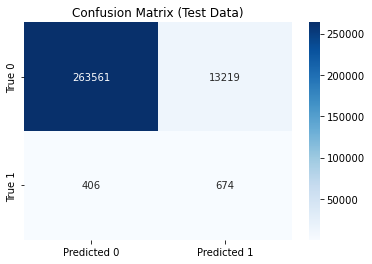

In [129]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtain probability estimates for each class
probs = log_reg.predict_proba(X_test_normalized)

# Set a threshold that corresponds to a specific false positive rate
fp_rate = 0.05
threshold = sorted(probs[:,1], reverse=True)[int(fp_rate*len(probs))]

# Use the threshold to make binary predictions
predictions = (probs[:,1] > threshold).astype(int)

# Obtain the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (Test Data)'
            )

print("Threshold for 5% False Positives:", threshold)

The chosen threshold to achieve 5\% false positives is **0.01126**. While this seems rather small, notice that the False Positives are at exactly 5\%.

## 7. If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [111]:
df_temp = df_select.copy()

In [112]:
df_temp["pred"] = (log_reg.predict_proba(X)[:,1] > threshold).astype(int)
df_temp = df_temp[["pred", "is_fraud", "amt"]]

c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [113]:
df_temp.head()

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19


[Text(0.5, 1.0, 'Confusion Matrix (All Original Data)')]

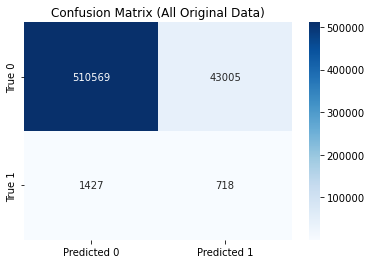

In [121]:
conf_matrix = confusion_matrix(y,df_temp["pred"])
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (All Original Data)'
            )

If the company makes 2\% off of true transactions and loses the full amount on false transactions, then the model predicts profit to be

$$ \pi = 0.02AMT_{TN,FN} - AMT_{TP,FP}$$

In [115]:
TN = df_temp.loc[(df_temp["pred"] == 0) & (df_temp["is_fraud"] == 0)]
FN = df_temp.loc[(df_temp["pred"] == 0) & (df_temp["is_fraud"] == 1)]
TP = df_temp.loc[(df_temp["pred"] == 1) & (df_temp["is_fraud"] == 1)]
FP = df_temp.loc[(df_temp["pred"] == 1) & (df_temp["is_fraud"] == 0)]

amt_TN = TN.amt.sum()
amt_FN = FN.amt.sum()
amt_TP = TP.amt.sum()
amt_FP = FP.amt.sum()

In [116]:
profit_model = 0.02*(amt_TN + amt_FN) - (amt_TP + amt_FP)
profit_actual = 0.02*(amt_TN + amt_FP) - (amt_TP + amt_FN)
print("Profit (Model): ", profit_model)
print("Profit (Actual): ", profit_actual)

Profit (Model):  -7486445.718199999
Profit (Actual):  -384733.1113999998


The model predicts a loss of about \$7.5 million whereas actual loss is closer to around \$400 thousand. The primary reason for this over-prediction is that the model threshold is perhaps not set high enough. Especially since the 5\% threshold was set on the training data, but it is clear from the above confusion matrix that False Positives for the whole data set is closer to 10\%. There are still a lot of false positives which the model assumes is fraud and thus deducts from profit quite heavily.

## 8. Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [103]:
logistic_lasso = LogisticRegression("l1", solver='saga')
logistic_lasso.fit(X_train_normalized, y_train)

c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [104]:
# Coefficients
coefs = logistic_lasso.coef_

# Variable Names
var_names = X.iloc[:,:-1].columns.values

In [105]:
coefs

array([[ 0.34028679, -0.08845681, -0.08623969, -0.09012936,  0.11270116,
         0.009817  ,  0.40579247, -0.11933167, -0.14767775, -0.19970664,
         0.3141298 ,  0.00153249, -0.08013153,  0.39224245,  0.06089259,
        -0.81001492,  0.06257473, -0.30142787, -0.00341392,  0.0130193 ,
         0.07182603,  0.1439186 ,  0.07581681]])

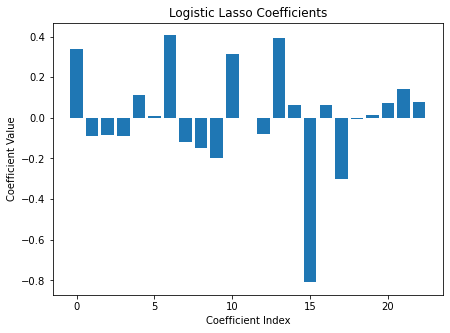

In [106]:
# Plot the coefficients
plt.figure(figsize=(7,5))
plt.bar(range(len(coefs[0])), coefs[0])
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Lasso Coefficients')
plt.show()

Through the regularization process, Lasso pushed **some** of our coefficients to zero which indicates their unimportance. However, many of our coefficients are larger than zero (in the positive or negative direction). Particularly, features with indicies 0, 6, 11, 13, 15, and 17 which corresponds to: `amt`, `category_grocery_pos`, `category_misc_pos`, `category_shopping_net`, `category_travel`, `time_var_December`.

It seems the most important feature was `category_travel` which implies that travel purchases see more fraud than others. We would use these category and amount variables in a prediction model; however, `time_var_December` is a bit more questionable. Although there could be logic in that Christmas sees more fraudulent purchases. Otherwise, all other features are closer to 0.